# Import libraries

In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings; warnings.simplefilter('ignore')

# Import Training Data

In [2]:
# Import training data 
train = pd.read_csv('train.csv')

In [3]:
train.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,...,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,...,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,...,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,...,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,...,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0


# Analysis and Splitting of data

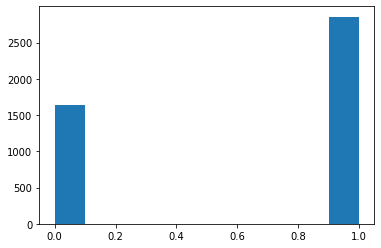

In [4]:

plt.hist(train['glasses'])
plt.show()
             

In [5]:
X = train.iloc[:,1:513].values
y = train.iloc[:,513].values

In [6]:

x_train , x_test ,y_train ,  y_test = train_test_split( X,y, test_size=0.2, random_state=0) 

# Training Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth =20,max_features=200, random_state=0).fit(x_train, y_train)

In [28]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features=200, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Accuracy , cv score and Confusion matrix

In [26]:
#Accuracy using regression
print('Accuracy of Random Forest model : ',rf.score(x_test,y_test)*100,'%')


Accuracy of Random Forest model :  90.55555555555556 %


In [29]:

print("Cross Validaion scores : ",cross_val_score(rf, x_test, y_test, cv=3))

Cross Validaion scores :  [0.80066445 0.78666667 0.76588629]


In [31]:


print('Confusion Matrix ','\n',confusion_matrix( y_test,rf.predict(x_test)))

Confusion Matrix  
 [[257  51]
 [ 34 558]]


# AUC ROC CURVE OF RF MODEL




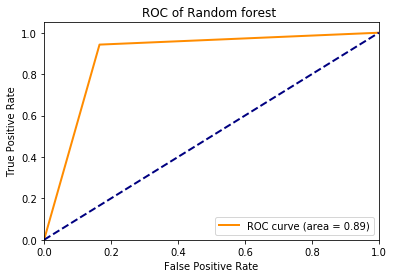

In [32]:
fpr,tpr,_= roc_curve(y_test,rf.predict(x_test))
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Random forest ')
plt.legend(loc="lower right")
plt.show()

# DIMENSION REDUCTION USING PCA 

In [33]:


from sklearn.decomposition import PCA
pca = PCA(0.9)
pca.fit(x_train)



PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca_x_train = pca.transform(x_train)
pca_x_test  = pca.transform(x_test)

# Accuracy , cv score and Confusion matrix

In [35]:
pca_rf = RandomForestClassifier(max_depth=20,max_features=200,random_state=0).fit(pca_x_train, y_train)

In [36]:
print('Accuracy of Random Forest model After PCA : ',pca_rf.score(pca_x_test,y_test)*100,'%')

Accuracy of Random Forest model After PCA :  99.8888888888889 %


In [37]:
print("Cross Validaion scores after PCA : ",cross_val_score(pca_rf, pca_x_test, y_test, cv=3))

Cross Validaion scores after PCA :  [0.99667774 0.99       0.97993311]


In [38]:
print('Confusion Matrix ','\n',confusion_matrix( y_test,pca_rf.predict(pca_x_test)))

Confusion Matrix  
 [[308   0]
 [  1 591]]


# AUC ROC of PCA applied model

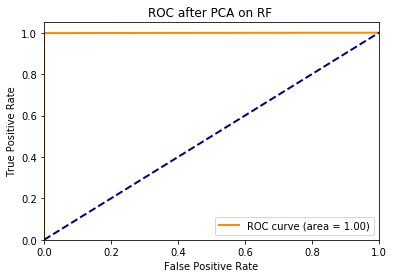

In [40]:
fpr,tpr,_= roc_curve(y_test,pca_rf.predict(pca_x_test))
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC after PCA on RF ')
plt.legend(loc="lower right")
plt.show()
